ECE 447: Dynamical Systems
===
Prof. Eric Klavins

&copy; 2019, University of Washington

Import required libraries
---

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
%matplotlib inline

Representation of Scalars and Vectors
---



Dynamical Systems
---
Let $x$ be an $n$ dimensional vector. A continuous, autonomous dynamical system has the form
     
> $\dot x = f(x)$
 
 stating how each component of $x$ changes with time. For example, to represent a falling object with height $h$ and velocity $v$, we can write
 
> $\dot{\left (
\begin{array}{c} 
h \\ 
v
\end{array} \right )} = 
\left (
\begin{array}{c} 
v \\ 
-g/m
\end{array} \right )
$ 
      
where $g$ is a constant, the force due to gravity, and $m$ is another constant, the mass of the object.

In this case, 

> $x = \left (
\begin{array}{c}
  h \\ 
  v
\end{array} \right )\;$  and $\;f(x) = \left ( \begin{array}{c} 
v \\ 
-g/m
\end{array} \right )$

Dynamical Systems in Python
---

**A Falling Object**: To represent the falling object system in Python, we write:

In [2]:
def f_rock(x,t):
  h,v = x;
  g = 9.81;
  m = 10.0;
  return [v,-g/m]

* Note that the vector $x$ and the return value of $f$ are represented in Python as row vectors instead of as column vectors like in our text book. 
* Also note that the function `f_rock` also takes a second parameter,$ $t, which stands for time. This is because we will later be using these functions with Python's ordinary differential equation solver, and it needs functions of this form. Our model could include time explicitly in the vector it returns, but for now we will not use that feature.

**A Pendulum**: Another example is a pendulum with angle theta and angular velocity omega.![alt text](https://raw.githubusercontent.com/klavins/ECE447/master/images/pendlum.png)

The equations for the pendulum are:

> $\dot{\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )} = 
\left (
\begin{array}{c} 
\omega \\ 
\frac{g}{l}\sin(\theta)-b \omega
\end{array} \right )
$

To model this system in Python we write:

In [94]:
def f_pendulum(x,t):
  theta, omega = x;
  g = 9.81;
  m = 1;
  l = 10;
  b = 0.5;
  return [omega,g*math.sin(theta)/l-b*omega]

Working with Dynamical System Functions
===

Each of these models can be evaluated at particular values of $x$. For example, at the point $h=1$, $v=0$, the rock's rate of change $\dot h$ is zero m/s, and its acceleration $\dot v$ is -9.81 m/s<sup>2</sup>.

In [4]:
f_rock([1,0],0)

[0, -0.9810000000000001]

On the other hand, at the point h=1, v=1, the rate of change of h is v=1, while the acceleration is still -0.981 m/s<sup>2</sup>.

In [5]:
f_rock([0,1],0)

[1, -0.9810000000000001]

For the pendulum, it is interesting to evaluate the model at various critical points like (&pi;, 0), and so on.

In [6]:
[
    f_pendulum([0,0],0),
    f_pendulum([math.pi/2,0],0),
    f_pendulum([math.pi,0],0),
    f_pendulum([3*math.pi/2,0],0)
]

[[0, 0.0],
 [0, 0.9810000000000001],
 [0, 1.2013785099635534e-16],
 [0, -0.9810000000000001]]

This shows that the pendulum is not accelerating when it is pointing straight down or straight up, while it is experiences a clockwise angular acceleration when it is pointing to the right and a counterclockwise angular acceleration when it is pointing to the left. 

Note that you will occasionally get really small numbers, like 1e-16. This is essentially zero, and comes from the fact that Python is not working with the actual value of $\pi$, but an approximation.

Phase Portraits
===

We can draw 2D system models by drawing vectors for a number of points in the plane. For example, with the pendulum we might grid theta into points from -2 &pi; to 2 &pi; and omega into points from -1 to 1. 

In Python, we can write the following to make a grid of values for which to evaluate the model. The `meshgrid` function from numpy helps with this. Here is a simple example of the use of `meshgrid`.

In [20]:
X,Y = np.meshgrid([-6.28,0,6.28],[-1,0,1])
print(X)
print("---")
print(Y)

[[-6.28  0.    6.28]
 [-6.28  0.    6.28]
 [-6.28  0.    6.28]]
---
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


We can determine the "shape" of a meshgrid component using the shape attribute:

In [23]:
X.shape

((3, 3), (3, 3))

Now by going through `X[i],Y[j]` for `i=0 to X.shape-1` and `j=0 to Y.shape -1` we get all pairs of coordinates on which to evaluate our dynamical system function.

To make a larger grid, we use `linspace`:

In [24]:
theta = np.linspace(-2.0 * math.pi, 2.0 * math.pi, 19)
omega = np.linspace(-2, 2, 19)
Theta,Omega = np.meshgrid(theta,omega)

Next, we make a grid of vectors to store the resulting evaluations. We initialize it to zero at first using the `zeros` function from numpy, which returns a matrix of zeros according with a size corresponding to the arguments provided. In this case, we use the shapes of Theta and Omega.

In [8]:
u,v = np.zeros(Theta.shape), np.zeros(Omega.shape)

Then we evaluate the model at each point in the grid, storing the resulting vectors in u,v:

In [108]:
n,m = Theta.shape
for i in range(n):
  for j in range(m):
    xdot = f_pendulum([Theta[i,j],Omega[i,j]],0)
    u[i,j] = xdot[0]
    v[i,j] = xdot[1]

Once we have all the vectors defined, we can use the `quiver` method to draw all of them on the $\theta-\omega$ plane.

(-2.5, 2.5)

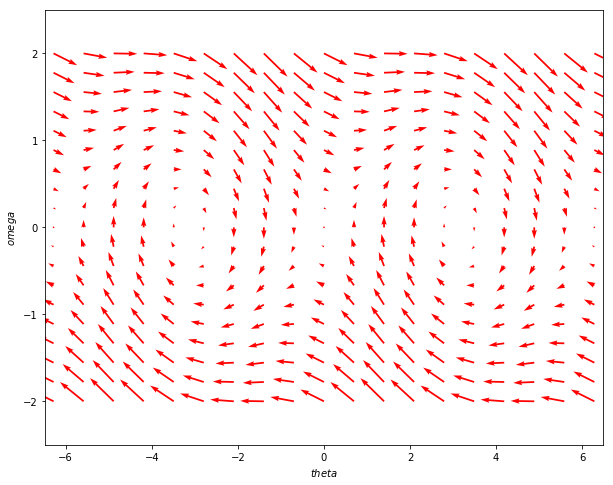

In [107]:
plt.rcParams['figure.figsize'] = [10,8]
Q = plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('$theta$')
plt.ylabel('$omega$')
plt.xlim([-2*math.pi-0.2, 2*math.pi+0.2])
plt.ylim([-2.5, 2.5])

Note that the equilibrium points are readily seen. You can also see that some of them see to attract the arrows around them, and some seem to repel them.

Solving Systems of ODEs
===

A *solution* to an ODE $\dot x = f(x)$ is a function $x(t)$ that satisfies the equation. Linear systems have explicitly, analytical solutions, as do some nonlinear systems. However, in general , nonlinear systems do not have analytical solutions. 

As an example of a simple linear system that does have a solution, consider the equation

> $\dot x = -x$

with $x(0) = 1$. The solution to this ODE is 

> $x(t) = e^{-t}.$

Taking the derivative of $x(t)$ gives $-e^{-t}$, which is indeed $-x$. 

We can also *numerically* solve the equation using the ODE solver $odeint$ from scipy. In this case, we first have to define our ODE using the form introduced above:

In [28]:
def f(x,t):
    return -x

Then define a set ot $t$ values over which to solve the ODE and call the solver with the function, an initial condition, and the $t$ values.

In [39]:
t = np.linspace(0., 10, 6)
x = spi.odeint(f,1,t);
x

array([[  1.00000000e+00],
       [  1.35335278e-01],
       [  1.83156390e-02],
       [  2.47875320e-03],
       [  3.35461697e-04],
       [  4.54009265e-05]])

Once we have a trajectory, we can plot it just like we plot other functions.

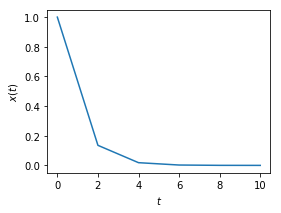

In [60]:
plt.rcParams['figure.figsize'] = [4,3]
plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');

Accuracy
===
The accuracy of the ODE solver is quite high by default. You can see this by looking at the different between the numerical and exact solutions.

Notice that the `x` returned by the solver is a 6x1 matrix, but `t` is a length 6 array. To turn $x$ into a list, we do `x.flatten()`.

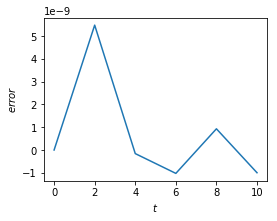

In [77]:
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

Increasing the number of time points does not necessary increase the accuracy, because the solver actually evaluates the ODE at many intermediate points.

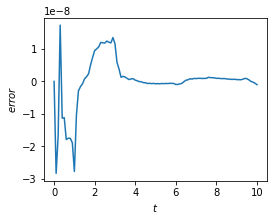

In [78]:
t = np.linspace(0., 10, 101)
x = spi.odeint(f,1,t);
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

However, you can control the accuracy with options to `odeint`. For example `rtol` and `atol` control the error tolerances. Increasing them likely increases the speed of the solver, but also decreases accuracy.

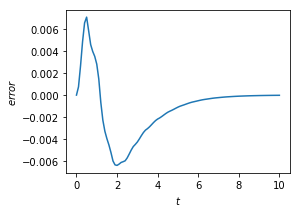

In [82]:
t = np.linspace(0., 10, 101)
x = spi.odeint(f,1,t,rtol=0.1,atol=0.1);
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

You can almost always just trust the defaults, but if you get innacurate results, you can start adjusting the parameters of `odeint`. To see what all is available, use the ? Jupyter method:

In [85]:
?spi.odeint

Pendulum Trajectories
===

We can now look in more detail at the pendulum by solving for a few different initial conditions and plotting the resulting trajectories as functions of time.

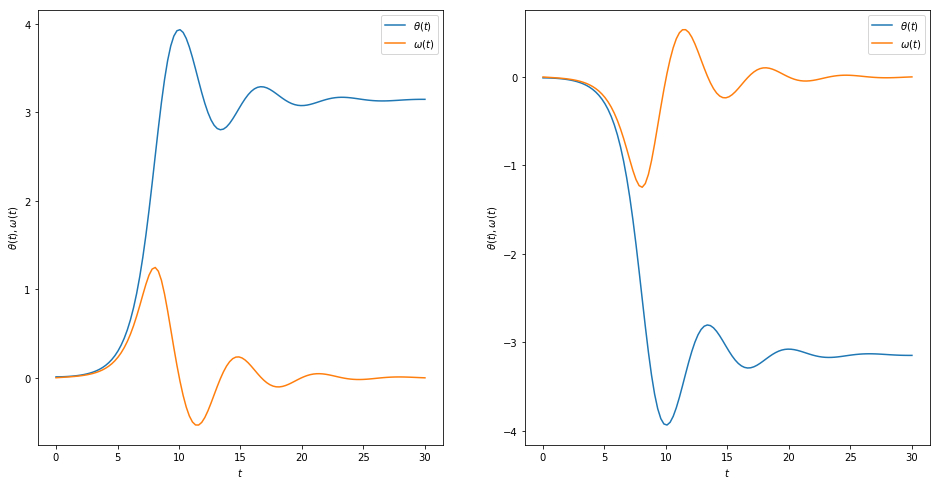

In [97]:
t = np.linspace(0., 30, 120)
x1 = spi.odeint(f_pendulum,[0.01,0],t);
x2 = spi.odeint(f_pendulum,[-0.01,0],t);
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].plot(t,x1[:,0],label="$\\theta(t)$");
ax[0].plot(t,x1[:,1],label="$\omega(t)$");
ax[1].plot(t,x2[:,0],label="$\\theta(t)$");
ax[1].plot(t,x2[:,1],label="$\omega(t)$");

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$\\theta(t), \omega(t)$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$\\theta(t), \omega(t)$')

ax[0].legend();
ax[1].legend();

A particularly pleasing plot can be made by superimposing the trajectories on the vector field plot as follows.

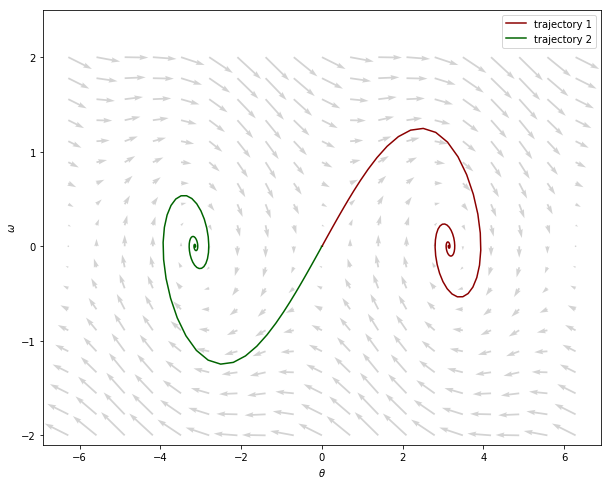

In [106]:
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(x1[:,0],x1[:,1],label="trajectory 1", color='darkred');
plt.plot(x2[:,0],x2[:,1],label="trajectory 2", color='darkgreen');
plt.quiver(Theta, Omega, u, v, color='lightgrey')
plt.ylim([-2.1, 2.5])
plt.xlabel('$\\theta$');
plt.ylabel('$\omega$');
plt.legend();